In [1]:
import pandas as pd
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

def load_data(file_path):
    """Charge les données à partir du fichier CSV."""
    return pd.read_csv(file_path)

def apply_gmm(data, column, n_components_range=range(1, 8)):
    """Applique le GMM à une colonne spécifique pour trouver le nombre optimal de clusters."""
    X = data[column].values.reshape(-1, 1)  # Redimensionnement pour le GMM
    bics = []
    for n_components in n_components_range:
        gmm = GaussianMixture(n_components=n_components, random_state=42)
        gmm.fit(X)
        bics.append(gmm.bic(X))
    optimal_n_components = n_components_range[np.argmin(bics)]
    gmm_optimal = GaussianMixture(n_components=optimal_n_components, random_state=42)
    gmm_optimal.fit(X)
    cluster_labels = gmm_optimal.predict(X)
    return optimal_n_components, cluster_labels, n_components_range, bics

def generate_columns_to_exclude(X):
    """Génère la liste des colonnes à exclure en fonction de la valeur de X."""
    base_columns_to_exclude = [
        "nightlights_50m", "nightlights_20m","nightlights_100m",
        "nightlights_25m", "nightlights_30m", "nightlights_150m",
        "nightlights_1000m", "nightlights_5000m", "nightlights_0m"
    ]
    
    specific_column = f"nightlights_{X}m"
    if specific_column in base_columns_to_exclude:
        base_columns_to_exclude.remove(specific_column)
    
    return base_columns_to_exclude

def main(file_path, X, moitiequarts, Y):
    """Charge les données, applique le GMM, et prépare le DataFrame final selon les paramètres fournis."""
    # Générer les noms dynamiquement
    column_to_cluster = f"nightlights_{X}m"
    df_name = f"df_nightlights_{X}m_{moitiequarts}_IPM_{Y}"
    bin_column = f"nightlights_{X}m_bins"
    
    # Générer la liste des colonnes à exclure
    columns_to_exclude = generate_columns_to_exclude(X)
    
    # Charger les données
    data = load_data(file_path)
    
    # Appliquer le GMM
    optimal_n_components, cluster_labels, n_components_range, bics = apply_gmm(data, column_to_cluster)
    
    # Afficher la liste des scores BIC
    print("Scores BIC pour chaque nombre de clusters :")
    for n, bic in zip(n_components_range, bics):
        print(f"Nombre de clusters: {n}, BIC: {bic}")
    
    # Créer le DataFrame final et ajouter les étiquettes de cluster
    df_result = data.drop(columns=columns_to_exclude)
    df_result[bin_column] = cluster_labels
    
    # Afficher les résultats
    print(f"Nombre optimal de clusters pour '{column_to_cluster}': {optimal_n_components}")
    print(df_result.head())
    
    # Sauvegarder le DataFrame avec un nom dynamique
    globals()[df_name] = df_result

    # Tracer le graphique des scores BIC
    plt.figure(figsize=(10, 6))
    plt.plot(n_components_range, bics, marker='o', linestyle='-')
    plt.title("Relation entre le nombre de clusters et le BIC")
    plt.xlabel("Nombre de clusters")
    plt.ylabel("Score BIC")
    plt.grid(True)
    
    # Annoter chaque point avec son score BIC en texte oblique
    for (i, txt) in zip(n_components_range, bics):
        plt.annotate(f"{txt:.2f}",  # Texte à annoter
                     (i, txt),  # Position (x, y) pour l'annotation
                     textcoords="offset points",  # Coordonnées relatives à la position
                     xytext=(0, 5),  # Décalage textuel (x, y)
                     ha='center',  # Alignement horizontal
                     rotation=45)  # Texte oblique

    plt.show()
    
    # Tracer l'histogramme de la distribution des "nightlights"
    plt.figure(figsize=(10, 6))
    plt.hist(df_result[bin_column], bins='auto', alpha=0.7, rwidth=0.85)
    plt.xlabel(f'Nightlights Bin {X} mètres')  # Label for the x-axis
    plt.ylabel('Frequency')  # Label for the y-axis
    plt.title(f'Distribution of Nightlights Bin {X} mètres')  # Title of the histogram
    plt.grid(axis='y', alpha=0.75)
    plt.show()
    
    # Définir le chemin du fichier de sortie
    output_file_path = f'D:\\Poverty_Predict_Par_Milieu\\Data_urbain\\df_nightlights_{X}m_{moitiequarts}_IPM_{Y}.csv'

    # Exporter le DataFrame en fichier CSV
    df_result.to_csv(output_file_path, index=False)
    print(f"DataFrame sauvegardé sous {output_file_path}")
    
    # Retourner le DataFrame avec le nom dynamique
    return df_result


Scores BIC pour chaque nombre de clusters :
Nombre de clusters: 1, BIC: 39559.26838942223
Nombre de clusters: 2, BIC: 36948.60577591798
Nombre de clusters: 3, BIC: 36921.46732232787
Nombre de clusters: 4, BIC: 36912.42740094886
Nombre de clusters: 5, BIC: 36272.15983879933
Nombre de clusters: 6, BIC: 36250.45545099691
Nombre de clusters: 7, BIC: 36290.976607757
Nombre optimal de clusters pour 'nightlights_50m': 6
  country  year   hhid  grappe  menage  vague      zae              region  \
0     CIV  2018  101.0       1       1      1  ABIDJAN  AUTONOME D'ABIDJAN   
1     CIV  2018  102.0       1       2      1  ABIDJAN  AUTONOME D'ABIDJAN   
2     CIV  2018  103.0       1       3      1  ABIDJAN  AUTONOME D'ABIDJAN   
3     CIV  2018  104.0       1       4      1  ABIDJAN  AUTONOME D'ABIDJAN   
4     CIV  2018  105.0       1       5      1  ABIDJAN  AUTONOME D'ABIDJAN   

   milieu         milieu2  ...                     interview__id  \
0  Urbain  Abidjan urbain  ...  2eb3d29ba9814a

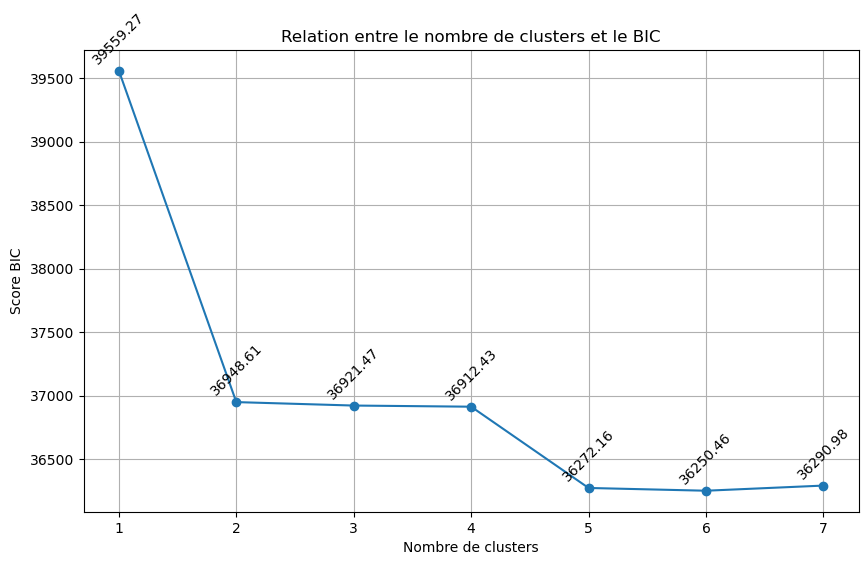

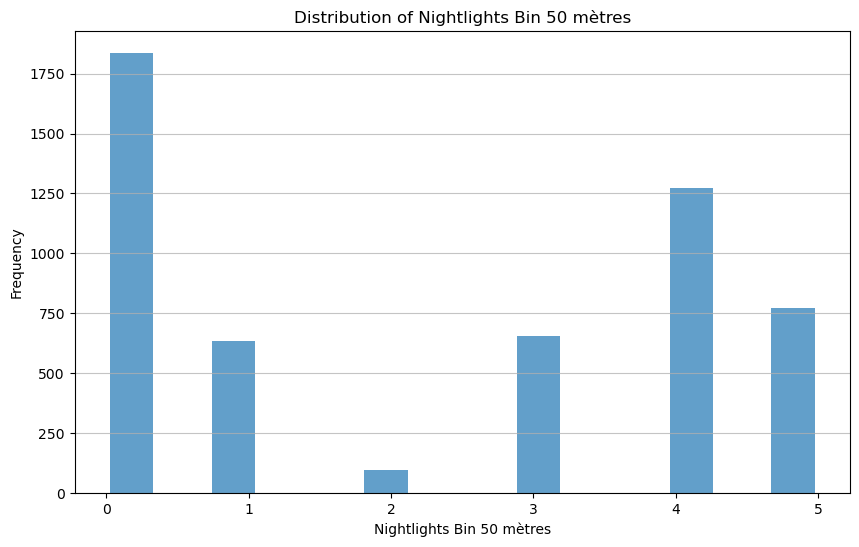

DataFrame sauvegardé sous D:\Poverty_Predict_Par_Milieu\Data_urbain\df_nightlights_50m_moitie_IPM_100.csv


In [2]:
# Paramètres de l'utilisateur
#file_path = r'D:\Poverty_Predict_Par_Milieu\rural_data.csv' #Chemin des données d'enquetes en milieu rural
file_path = r'D:\Poverty_Predict_Par_Milieu\urbain_data.csv' #Chemin des données d'enquetes en milieu urbain

X = 50
moitiequarts = 'moitie'
Y = 100

# Exécution principale
df_result = main(file_path, X, moitiequarts, Y)

In [3]:
# Affichage du DataFrame avec le nom dynamique
df_name = f"df_nightlights_{X}m_{moitiequarts}_IPM_{Y}"
print(f"Affichage de {df_name} :")
print(globals()[df_name])

Affichage de df_nightlights_50m_moitie_IPM_100 :
     country  year      hhid  grappe  menage  vague      zae  \
0        CIV  2018     101.0       1       1      1  ABIDJAN   
1        CIV  2018     102.0       1       2      1  ABIDJAN   
2        CIV  2018     103.0       1       3      1  ABIDJAN   
3        CIV  2018     104.0       1       4      1  ABIDJAN   
4        CIV  2018     105.0       1       5      1  ABIDJAN   
...      ...   ...       ...     ...     ...    ...      ...   
5263     CIV  2018  107908.0    1079       8      1   CENTRE   
5264     CIV  2018  107909.0    1079       9      1   CENTRE   
5265     CIV  2018  107910.0    1079      10      1   CENTRE   
5266     CIV  2018  107911.0    1079      11      1   CENTRE   
5267     CIV  2018  107913.0    1079      13      1   CENTRE   

                  region  milieu         milieu2  ...  \
0     AUTONOME D'ABIDJAN  Urbain  Abidjan urbain  ...   
1     AUTONOME D'ABIDJAN  Urbain  Abidjan urbain  ...   
2     AUTON

In [4]:
globals()[df_name][f'nightlights_{X}m_bins'].unique()

array([3, 2, 5, 1, 0, 4], dtype=int64)

##### I - Affichage des grappes (ZD) (cette section n'est pas une nécessité)

In [5]:
Data_milieu='Data_urbain'

In [6]:
import pandas as pd

# Charger le DataFrame sans doublons
file_path = f'D:\\Poverty_Predict_Par_Milieu\\{Data_milieu}\\df_nightlights_{X}m_{moitiequarts}_IPM_{Y}.csv'
df = pd.read_csv(file_path)

# Afficher les éléments de la colonne 'grappe'
print("Éléments de la colonne 'grappe':")
print(df['grappe'])

# Afficher les chiffres uniques dans la colonne 'grappe'
unique_values = df['grappe'].unique()
print("\nChiffres uniques dans la colonne 'grappe':")
print(unique_values)

# Afficher la fréquence de chaque chiffre unique
value_counts = df['grappe'].value_counts()
print("\nFréquence des chiffres dans la colonne 'grappe':")
print(value_counts)


Éléments de la colonne 'grappe':
0          1
1          1
2          1
3          1
4          1
        ... 
5263    1079
5264    1079
5265    1079
5266    1079
5267    1079
Name: grappe, Length: 5268, dtype: int64

Chiffres uniques dans la colonne 'grappe':
[   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   60   61   62   63   64   65   66   67   68   69   70
   71   72   73   74   75   76   77   78   79   80   82   88   89   90
   91   92   93   94   95   96  103  104  107  108  113  126  127  136
  144  145  146  147  148  149  150  151  152  153  154  162  164  166
  167  179  180  183  184  185  186  187  188  189  190  191  192  193
  194  195  196  197  198  199  200  201  202  203  204  215  216  217
  218  219  220  222  226  22

##### Ajout d'une colonne 'is_train'

In [7]:
import pandas as pd

def load_dataframe(file_path):
    """Charger le DataFrame à partir du fichier CSV."""
    return pd.read_csv(file_path)

def mark_sample_by_group(df, group_column, n_samples):
    """Grouper le DataFrame par la colonne spécifiée, sélectionner un nombre aléatoire de lignes par groupe, et marquer ces lignes."""
    # Créer une colonne 'is_train' initialisée à False
    df['is_train'] = False
    # Sélectionner aléatoirement des échantillons par groupe
    sampled_indices = df.groupby(group_column).apply(lambda x: x.sample(n_samples).index).explode()
    # Marquer les lignes sélectionnées
    df.loc[sampled_indices, 'is_train'] = True
    return df

def save_dataframe(df, file_path):
    """Sauvegarder le DataFrame en fichier CSV."""
    df.to_csv(file_path, index=False)

In [8]:
# Définir les variables X, moitiequarts et Y pour personnaliser les chemins de fichiers
X = 50
moitiequarts = 'moitie'
Y = 100
Data_milieu='Data_urbain'

In [9]:
# Chemin vers le fichier CSV d'origine
original_file_path = f'D:\\Poverty_Predict_Par_Milieu\\{Data_milieu}\\df_nightlights_{X}m_{moitiequarts}_IPM_{Y}.csv'

# Charger le DataFrame
df = load_dataframe(original_file_path)

# Marquer les lignes sélectionnées de manière aléatoire par groupe
df_marked = mark_sample_by_group(df, 'grappe', 2)
print("DataFrame avec colonne 'is_train':")
print(df_marked)

# Sauvegarder le DataFrame avec la nouvelle colonne 'is_train' en tant que fichier CSV
new_file_path = f'D:\\Poverty_Predict_Par_Milieu\\{Data_milieu}\\df_nightlights_{X}m_{moitiequarts}_IPM_{Y}_marked.csv'

save_dataframe(df_marked, new_file_path)

print("Le DataFrame avec colonne 'is_train' a été sauvegardé avec succès.")


DataFrame avec colonne 'is_train':
     country  year      hhid  grappe  menage  vague      zae  \
0        CIV  2018     101.0       1       1      1  ABIDJAN   
1        CIV  2018     102.0       1       2      1  ABIDJAN   
2        CIV  2018     103.0       1       3      1  ABIDJAN   
3        CIV  2018     104.0       1       4      1  ABIDJAN   
4        CIV  2018     105.0       1       5      1  ABIDJAN   
...      ...   ...       ...     ...     ...    ...      ...   
5263     CIV  2018  107908.0    1079       8      1   CENTRE   
5264     CIV  2018  107909.0    1079       9      1   CENTRE   
5265     CIV  2018  107910.0    1079      10      1   CENTRE   
5266     CIV  2018  107911.0    1079      11      1   CENTRE   
5267     CIV  2018  107913.0    1079      13      1   CENTRE   

                  region  milieu         milieu2  ...  GPS__Latitude  \
0     AUTONOME D'ABIDJAN  Urbain  Abidjan urbain  ...       5.340541   
1     AUTONOME D'ABIDJAN  Urbain  Abidjan urbain  ..

#### Concatenation de la colonne 'is train' et des images, nous avons 2 ménages par ZD sélectionnés aléatoirement en zone urbaine

In [10]:
import os
import pandas as pd

def process_images_and_merge_data(csv_file_path, images_folder_path, save_folder_path, X, moitiequarts, Y):
    """Automatise le traitement des images et la fusion des données avec des noms de variables dynamiques."""
    # Générer le nom dynamique du DataFrame
    df_name = f"df_nightlights_{X}m_{moitiequarts}_IPM_{Y}"
    
    # Lire le fichier CSV sauvegardé
    df_nightlights = pd.read_csv(csv_file_path)
    
    # Extraire les informations des images
    image_info = []
    for image_file in os.listdir(images_folder_path):
        base_name, _ = os.path.splitext(image_file)
        base_name_with_extension = base_name + '.png'
        parts = base_name.split('_')
        if len(parts) >= 2:
            menage_lat, menage_lon = float(parts[0]), float(parts[1])
            image_info.append({
                'image_name': base_name_with_extension,
                'menage_lat': menage_lat,
                'menage_lon': menage_lon
            })

    df_images = pd.DataFrame(image_info)
    
    # Convertir les latitudes et longitudes pour la fusion
    df_nightlights['GPS__Latitude'] = df_nightlights['GPS__Latitude'].astype(float)
    df_nightlights['GPS__Longitude'] = df_nightlights['GPS__Longitude'].astype(float)

    # Fusionner les DataFrames
    df_download = pd.merge(df_images, df_nightlights, 
                           left_on=['menage_lat', 'menage_lon'], 
                           right_on=['GPS__Latitude', 'GPS__Longitude'], how='inner')

    # Sélection et renommage des colonnes pour le résultat final
    df_download = df_download.rename(columns={
        'pcexp': 'pcexp',
        f'nightlights_{X}m': f'nightlights_{X}m',
        f'nightlights_{X}m_bins': f'nightlights_{X}m_bins'
    })

    # Ajouter les colonnes 'grappe' et 'is_train'
    df_download['grappe'] = df_download['grappe']
    df_download['hhweight']=df_download['hhweight']
    df_download['hhsize']=df_download['hhsize']
    df_download['is_train'] = df_download['is_train']

    df_download = df_download[['image_name', 'menage_lat', 'menage_lon', 'grappe', 'hhweight', 'hhsize','is_train', 'pcexp', f'nightlights_{X}m', f'nightlights_{X}m_bins']]
    
    # Sauvegarder le DataFrame fusionné avec les doublons
    download_file_path_with_duplicates = os.path.join(save_folder_path, f'df_download_{X}m_{moitiequarts}_IPM_{Y}.csv')
    df_download.to_csv(download_file_path_with_duplicates, index=False)
    
    print(f"DataFrame fusionné avec doublons sauvegardé sous {download_file_path_with_duplicates}")
    
    # Étape 6: Afficher les valeurs du DataFrame
    print(df_download.head())
    print(df_download.shape)
    
    # Identifier les doublons exacts dans 'image_name' et obtenir leurs indices
    doublons_indices = df_download[df_download.duplicated(subset=['image_name'], keep='first')].index

    # Afficher les valeurs de 'image_name' qui sont des doublons et leurs indices
    for indice in doublons_indices:
        valeur_doublon = df_download.loc[indice, 'image_name']
        print(f"Indice: {indice}, Valeur Doublon: {valeur_doublon}")

    # Supprimer les doublons, en ne gardant que la première occurrence
    df_download_sans_doublons = df_download.drop_duplicates(subset=['image_name'], keep='first')

    # Maintenant, df_download_sans_doublons contient le DataFrame sans les doublons

    # Sauvegarder le DataFrame sans doublons avec un nom dynamique
    download_file_path_without_duplicates = os.path.join(save_folder_path, f'df_download_{X}m_{moitiequarts}_IPM_{Y}_vf.csv')
    df_download_sans_doublons.to_csv(download_file_path_without_duplicates, index=False)
    
    print(f"DataFrame fusionné sans doublons sauvegardé sous {download_file_path_without_duplicates}")

    # Compter le nombre total d'images
    image_count = len(os.listdir(images_folder_path))
    print(f"Nombre total d'images : {image_count}")
    
    return df_download, df_download_sans_doublons


In [11]:
# Paramètres de l'utilisateur
X = 50
moitiequarts = 'moitie'
Y = 100
Data_milieu='Data_urbain'

#### Changement de chemin

In [12]:
# Chemins des fichiers

csv_file_path = f'D:\\Poverty_Predict_Par_Milieu\\{Data_milieu}\\df_nightlights_{X}m_{moitiequarts}_IPM_{Y}_marked.csv'
images_folder_path =r'D:\Processed_Data_400_42m_100img\Processed_Data_400\Image_Nombre_100_images_code_5'
save_folder_path = f'D:\\Poverty_Predict_Par_Milieu\\{Data_milieu}'

In [13]:
# Exécution principale
df_download_result, df_download_sans_doublons_result = process_images_and_merge_data(csv_file_path, images_folder_path, save_folder_path, X, moitiequarts, Y)


DataFrame fusionné avec doublons sauvegardé sous D:\Poverty_Predict_Par_Milieu\Data_urbain\df_download_50m_moitie_IPM_100.csv
                      image_name  menage_lat  menage_lon  grappe  hhweight  \
0    10.0052188_-5.9011314_1.png   10.005219   -5.901131     167  547.8328   
1   10.0052188_-5.9011314_10.png   10.005219   -5.901131     167  547.8328   
2  10.0052188_-5.9011314_100.png   10.005219   -5.901131     167  547.8328   
3   10.0052188_-5.9011314_11.png   10.005219   -5.901131     167  547.8328   
4   10.0052188_-5.9011314_12.png   10.005219   -5.901131     167  547.8328   

   hhsize  is_train      pcexp  nightlights_50m  nightlights_50m_bins  
0       1     False  695713.06        17.569902                     5  
1       1     False  695713.06        17.569902                     5  
2       1     False  695713.06        17.569902                     5  
3       1     False  695713.06        17.569902                     5  
4       1     False  695713.06        17.5699

In [14]:
pd.read_csv(f'D:\\Poverty_Predict_Par_Milieu\\{Data_milieu}\\df_download_{X}m_{moitiequarts}_IPM_{Y}_vf.csv')


,image_name,menage_lat,menage_lon,grappe,hhweight,hhsize,is_train,pcexp,nightlights_50m,nightlights_50m_bins
0,10.0052188_-5.9011314_1.png,10.005219,-5.901131,167,547.83280,1,False,695713.06,17.569902,5
1,10.0052188_-5.9011314_10.png,10.005219,-5.901131,167,547.83280,1,False,695713.06,17.569902,5
2,10.0052188_-5.9011314_100.png,10.005219,-5.901131,167,547.83280,1,False,695713.06,17.569902,5
3,10.0052188_-5.9011314_11.png,10.005219,-5.901131,167,547.83280,1,False,695713.06,17.569902,5
4,10.0052188_-5.9011314_12.png,10.005219,-5.901131,167,547.83280,1,False,695713.06,17.569902,5
...,...,...,...,...,...,...,...,...,...,...
526695,9.99659178312868_-7.83548598177731_95.png,9.996592,-7.835486,800,84.23976,7,False,475279.28,3.531191,0
526696,9.99659178312868_-7.83548598177731_96.png,9.996592,-7.835486,800,84.23976,7,False,475279.28,3.531191,0
526697,9.99659178312868_-7.83548598177731_97.png,9.996592,-7.835486,800,84.23976,7,False,475279.28,3.531191,0
526698,9.99659178312868_-7.83548598177731_98.png,9.996592,-7.835486,800,84.23976,7,False,475279.28,3.531191,0


In [15]:
essaie=pd.read_csv(f'D:\\Poverty_Predict_Par_Milieu\\{Data_milieu}\\df_download_{X}m_{moitiequarts}_IPM_{Y}_vf.csv')


In [16]:
sum(essaie["is_train"])

88000

In [17]:
essaie_2=pd.read_csv(f'D:\\Poverty_Predict_Par_Milieu\\{Data_milieu}\\df_nightlights_{X}m_{moitiequarts}_IPM_{Y}_marked.csv')

In [18]:
sum(essaie_2["is_train"])

880

In [19]:
#### globals()[df_name] est équivalent à df_download_Xm_moitiequarts_IPM_Y

##### On divise les données en ensemble d'entrainement et en ensemble de validation avec un ménage par ZD dans le training set et le reste dans le validation set 

In [20]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import pandas as pd


def load_and_split_data(file_path, X, moitiequarts, Y):
    """Charge le DataFrame et divise les données en ensembles d'entraînement et de validation basés sur la colonne 'is_train'."""
    # Générer le nom dynamique du DataFrame
    df_name = f"df_download_{X}m_{moitiequarts}_IPM_{Y}"
    
    # Charger le DataFrame
    df = pd.read_csv(file_path)
    
    # Séparer les données en ensembles d'entraînement et de validation
    df_train = df[df['is_train'] == True]
    df_valid = df[df['is_train'] == False]
    
    # Afficher la proportion d'éléments dans l'ensemble d'entraînement
    train_proportion = df_train.shape[0] / df.shape[0]
    print(f"Proportion d'éléments dans l'ensemble d'entraînement : {train_proportion}")
    
    # Retourner les DataFrames et le nom dynamique
    return df, df_train, df_valid, df_name

In [21]:
# Paramètres de l'utilisateur
X = 50
moitiequarts = 'moitie'
Y = 100
Data_milieu='Data_urbain'
# Chemin du fichier
file_path = f'D:\\Poverty_Predict_Par_Milieu\\{Data_milieu}\\df_download_{X}m_{moitiequarts}_IPM_{Y}_vf.csv'

# Exécution principale
df_download_result, df_train, df_valid, df_name = load_and_split_data(file_path, X, moitiequarts, Y)

Proportion d'éléments dans l'ensemble d'entraînement : 0.1670780330358838


In [22]:
# Attribuer le DataFrame à une variable avec un nom dynamique
globals()[df_name] = df_download_result

# Affichage du DataFrame modifié
print(f"Affichage de {df_name} :")
print(globals()[df_name].head()) 



Affichage de df_download_50m_moitie_IPM_100 :
                      image_name  menage_lat  menage_lon  grappe  hhweight  \
0    10.0052188_-5.9011314_1.png   10.005219   -5.901131     167  547.8328   
1   10.0052188_-5.9011314_10.png   10.005219   -5.901131     167  547.8328   
2  10.0052188_-5.9011314_100.png   10.005219   -5.901131     167  547.8328   
3   10.0052188_-5.9011314_11.png   10.005219   -5.901131     167  547.8328   
4   10.0052188_-5.9011314_12.png   10.005219   -5.901131     167  547.8328   

   hhsize  is_train      pcexp  nightlights_50m  nightlights_50m_bins  
0       1     False  695713.06        17.569902                     5  
1       1     False  695713.06        17.569902                     5  
2       1     False  695713.06        17.569902                     5  
3       1     False  695713.06        17.569902                     5  
4       1     False  695713.06        17.569902                     5  


In [23]:
# Afficher la proportion des données dans l'ensemble d'entraînement
train_proportion = globals()[df_name]['is_train'].mean()
print(f"Proportion des données dans l'ensemble d'entraînement : {train_proportion}")

# Sauvegarder les DataFrames d'entraînement et de validation
train_file_path = f'D:/Poverty_Predict_Par_Milieu/{Data_milieu}/{df_name}_train.csv'
valid_file_path = f'D:/Poverty_Predict_Par_Milieu/{Data_milieu}/{df_name}_valid.csv'
df_train.to_csv(train_file_path, index=False)
df_valid.to_csv(valid_file_path, index=False)

print(f"DataFrame d'entraînement sauvegardé sous {train_file_path}")
print(f"DataFrame de validation sauvegardé sous {valid_file_path}")

# Vérification finale
print("Ensemble d'entraînement :")
print(df_train.head())
print("Ensemble de validation :")
print(df_valid.head())



Proportion des données dans l'ensemble d'entraînement : 0.1670780330358838
DataFrame d'entraînement sauvegardé sous D:/Poverty_Predict_Par_Milieu/Data_urbain/df_download_50m_moitie_IPM_100_train.csv
DataFrame de validation sauvegardé sous D:/Poverty_Predict_Par_Milieu/Data_urbain/df_download_50m_moitie_IPM_100_valid.csv
Ensemble d'entraînement :
                        image_name  menage_lat  menage_lon  grappe  hhweight  \
200    10.0074722_-5.9032249_1.png   10.007472   -5.903225     167  547.8328   
201   10.0074722_-5.9032249_10.png   10.007472   -5.903225     167  547.8328   
202  10.0074722_-5.9032249_100.png   10.007472   -5.903225     167  547.8328   
203   10.0074722_-5.9032249_11.png   10.007472   -5.903225     167  547.8328   
204   10.0074722_-5.9032249_12.png   10.007472   -5.903225     167  547.8328   

     hhsize  is_train      pcexp  nightlights_50m  nightlights_50m_bins  
200       5      True  328734.94         5.994053                     0  
201       5      True  

In [24]:
print("Ensemble d'entraînement :")
print(df_train.info())
print("Ensemble de validation :")
print(df_valid.info())

Ensemble d'entraînement :
<class 'pandas.core.frame.DataFrame'>
Index: 88000 entries, 200 to 525899
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   image_name            88000 non-null  object 
 1   menage_lat            88000 non-null  float64
 2   menage_lon            88000 non-null  float64
 3   grappe                88000 non-null  int64  
 4   hhweight              88000 non-null  float64
 5   hhsize                88000 non-null  int64  
 6   is_train              88000 non-null  bool   
 7   pcexp                 88000 non-null  float64
 8   nightlights_50m       88000 non-null  float64
 9   nightlights_50m_bins  88000 non-null  int64  
dtypes: bool(1), float64(5), int64(3), object(1)
memory usage: 6.8+ MB
None
Ensemble de validation :
<class 'pandas.core.frame.DataFrame'>
Index: 438700 entries, 0 to 526699
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtyp

In [25]:
# On voit qu'on entraine sur 880 ménages et on valide sur 4387

##### Creation des dossiers training et validation set pour accueillir les données

In [26]:
globals()[df_name]

,image_name,menage_lat,menage_lon,grappe,hhweight,hhsize,is_train,pcexp,nightlights_50m,nightlights_50m_bins
0,10.0052188_-5.9011314_1.png,10.005219,-5.901131,167,547.83280,1,False,695713.06,17.569902,5
1,10.0052188_-5.9011314_10.png,10.005219,-5.901131,167,547.83280,1,False,695713.06,17.569902,5
2,10.0052188_-5.9011314_100.png,10.005219,-5.901131,167,547.83280,1,False,695713.06,17.569902,5
3,10.0052188_-5.9011314_11.png,10.005219,-5.901131,167,547.83280,1,False,695713.06,17.569902,5
4,10.0052188_-5.9011314_12.png,10.005219,-5.901131,167,547.83280,1,False,695713.06,17.569902,5
...,...,...,...,...,...,...,...,...,...,...
526695,9.99659178312868_-7.83548598177731_95.png,9.996592,-7.835486,800,84.23976,7,False,475279.28,3.531191,0
526696,9.99659178312868_-7.83548598177731_96.png,9.996592,-7.835486,800,84.23976,7,False,475279.28,3.531191,0
526697,9.99659178312868_-7.83548598177731_97.png,9.996592,-7.835486,800,84.23976,7,False,475279.28,3.531191,0
526698,9.99659178312868_-7.83548598177731_98.png,9.996592,-7.835486,800,84.23976,7,False,475279.28,3.531191,0


In [28]:
# Préparation des répertoires et chargement des DataFrames d'entraînement et de validation
BASE_DIR = r'D:\Poverty_Predict_Par_Milieu'

RANDOM_SEED = 7 # Pour réplication
PROCESSED_DIR = os.path.join(BASE_DIR,f'{Data_milieu}', 'processed') 

CNN_TRAIN_IMAGE_DIR = os.path.join(BASE_DIR, f'{Data_milieu}/cnn_images_{X}m_{moitiequarts}_IPM_{Y}')
CNN_SAVE_DIR = os.path.join(BASE_DIR, f'models_{X}m_{moitiequarts}_IPM_{Y}') 

os.makedirs(CNN_TRAIN_IMAGE_DIR, exist_ok=True)
os.makedirs(CNN_SAVE_DIR, exist_ok=True) 
os.makedirs(PROCESSED_DIR, exist_ok=True) 

# Calcul du nombre de classes uniques dans 'nightlights_{X}m_bins'
nombre_de_classes = globals()[df_name][f'nightlights_{X}m_bins'].nunique()

# Création de labels basés sur le nombre de classes
labels = [str(i) for i in range(nombre_de_classes)]

# Sauvegarde du nouveau DataFrame
globals()[df_name].to_csv(os.path.join(PROCESSED_DIR, f'image_download_actual_{X}m_{moitiequarts}_IPM_{Y}.csv'), index=False)

# Création des dossiers de base pour 'train' et 'valid'
os.makedirs(os.path.join(CNN_TRAIN_IMAGE_DIR, f'train_{X}m_{moitiequarts}_IPM_{Y}'), exist_ok=True)
os.makedirs(os.path.join(CNN_TRAIN_IMAGE_DIR, f'valid_{X}m_{moitiequarts}_IPM_{Y}'), exist_ok=True)

# Création des sous-dossiers pour chaque label dans 'train' et 'valid'
for l in labels:
    os.makedirs(os.path.join(CNN_TRAIN_IMAGE_DIR, f'train_{X}m_{moitiequarts}_IPM_{Y}', l), exist_ok=True)
    os.makedirs(os.path.join(CNN_TRAIN_IMAGE_DIR, f'valid_{X}m_{moitiequarts}_IPM_{Y}', l), exist_ok=True)

# Séparation des ensembles d'entraînement et de validation
t = globals()[df_name][globals()[df_name]['is_train']]
v = globals()[df_name][~globals()[df_name]['is_train']]

# Sauvegarde des ensembles d'entraînement et de validation
v.to_csv(os.path.join(BASE_DIR, f'validation_set_{X}m_{moitiequarts}_IPM_{Y}.csv'), index=False)
t.to_csv(os.path.join(BASE_DIR, f'training_set_{X}m_{moitiequarts}_IPM_{Y}.csv'), index=False)

print(f"Les fichiers de validation et d'entraînement ont été sauvegardés.")

# Longueur des ensembles d'entraînement et de validation
print(f"Nombre d'éléments dans l'ensemble d'entraînement: {len(t)}")
print(f"Nombre d'éléments dans l'ensemble de validation: {len(v)}")

Les fichiers de validation et d'entraînement ont été sauvegardés.
Nombre d'éléments dans l'ensemble d'entraînement: 88000
Nombre d'éléments dans l'ensemble de validation: 438700


#### changement de chemin

In [29]:
IMAGE_DIR = r'D:\Processed_Data_400_42m_100img\Processed_Data_400\Image_Nombre_100_images_code_5'


##### Préparation des directoires, marquages des images d'entrainement et de validation dans des dossiers 

In [30]:
# Organiser les images d'entraînement
print('Organizing training images')

for im_name, nl in tqdm(zip(t['image_name'], t[f'nightlights_{X}m_bins']), total=len(t)):
    src = os.path.abspath(os.path.join(IMAGE_DIR, im_name))  
    dest = os.path.join(CNN_TRAIN_IMAGE_DIR, f'train_{X}m_{moitiequarts}_IPM_{Y}', str(nl), im_name)
    
    os.makedirs(os.path.dirname(dest), exist_ok=True)
    
    try:
        os.symlink(src, dest)
    except OSError as e:
        print(f"Error creating symlink for {im_name}: {e}")


Organizing training images


100%|██████████| 88000/88000 [00:14<00:00, 6202.26it/s]


In [31]:
# Organiser les images de validation
print('Organizing validation images')

for im_name, nl in tqdm(zip(v['image_name'], v[f'nightlights_{X}m_bins']), total=len(v)):
    src = os.path.abspath(os.path.join(IMAGE_DIR, im_name))  
    dest = os.path.join(CNN_TRAIN_IMAGE_DIR, f'valid_{X}m_{moitiequarts}_IPM_{Y}', str(nl), im_name)

    os.makedirs(os.path.dirname(dest), exist_ok=True)
    
    try:
        os.symlink(src, dest)
    except OSError as e:
        print(f"Error creating symlink for {im_name}: {e}")



Organizing validation images


100%|██████████| 438700/438700 [01:13<00:00, 5994.35it/s]


In [32]:
# Montre le décompte des images par classe dans chaque dossier du training set
counts = []
for l in range(nombre_de_classes):
    folder_name = f"{l}" 
    path_to_folder = os.path.join(CNN_TRAIN_IMAGE_DIR,f'train_{X}m_{moitiequarts}_IPM_{Y}', folder_name)
    counts.append(len(os.listdir(path_to_folder)))

print(counts)

# Calculer la proportion de chaque classe
proportions = [c/sum(counts) for c in counts]
print(proportions)

# Afficher la somme totale pour vérifier
print(sum(counts))


[30400, 11200, 1800, 11300, 21400, 11900]
[0.34545454545454546, 0.12727272727272726, 0.020454545454545454, 0.12840909090909092, 0.2431818181818182, 0.13522727272727272]
88000


### Entrainement du modèle

##### Préparation des Données et du Modèle
##### Initialisation du Modèle
##### Transformation des Données

In [33]:
!pip install torchvision

In [34]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import copy

##### Mettre à jour le nombre de classe

In [35]:
# Le directoire
data_dir = CNN_TRAIN_IMAGE_DIR

# Activer le débogage CUDA
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

# Modèles à choisir entre resnet, alexnet, vgg, squeezenet, densenet, inception
model_name = "vgg"

# Le nombre de catégories pour la classification
num_classes = 6 #Mettre à jour le nombre de classe

# Taille de lot pour l'entraînement (à modifier selon la quantité de mémoire disponible)
batch_size = 8

# Nombre d'époques pour l'entraînement,
#les 10 premières seront consacrées à l'entraînement des nouvelles couches,
#les 10 dernières à l'ensemble du modèle.
num_epochs = 20

# Flag pour l'extraction de caractéristiques. Lorsqu'il est à False, nous affinons tout le modèle.
#   quand il est à True, nous mettons à jour uniquement les paramètres des couches remodelées
feature_extract = True 





In [36]:
data_dir

'D:\\Poverty_Predict_Par_Milieu\\Data_urbain/cnn_images_50m_moitie_IPM_100'

In [37]:
def initialize_model(model_name, num_classes, feature_extract, use_pretrained=True):
    # Initialisez les variables qui seront définies dans ce 'if-statement'.
    # Chacune de ces variables est spécifique au modèle.
    model_ft = models.vgg11_bn(pretrained=use_pretrained)
    set_parameter_requires_grad(model_ft, feature_extract)
    num_ftrs = model_ft.classifier[6].in_features
    model_ft.classifier[6] = nn.Linear(num_ftrs,num_classes)
    input_size = 224
    return model_ft, input_size

def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False 



In [38]:
# Initialiser le modèle pour l'exécution
model_ft, input_size = initialize_model(model_name, num_classes, feature_extract, use_pretrained=True)

# Imprimer
model_ft 

print('Initializing Datasets and Dataloaders...')

c:\Users\Dell\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG11_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG11_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Initializing Datasets and Dataloaders...


In [39]:
# Data augmentation and normalization for training
# Just normalization for validation

data_transforms = {
    f'train_{X}m_{moitiequarts}_IPM_{Y}': transforms.Compose([
        transforms.RandomResizedCrop(input_size),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    f'valid_{X}m_{moitiequarts}_IPM_{Y}': transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [40]:
##### Création des Ensembles de Données et des Dataloaders
##### Configuration de l'Appareil et du Modèle
##### Optimisation et Mise à Jour des Paramètres

In [41]:
# Création des ensembles de données d'entraînement et de validation
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in [f'train_{X}m_{moitiequarts}_IPM_{Y}', f'valid_{X}m_{moitiequarts}_IPM_{Y}']}

# Création des dataloaders d'entraînement et de validation
dataloaders_dict = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4) for x in [f'train_{X}m_{moitiequarts}_IPM_{Y}', f'valid_{X}m_{moitiequarts}_IPM_{Y}']}



In [42]:
# Inspectons pour savoir si nous avons un GPU (Graphical Processing Unit) disponible
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('device:', device)



device: cuda:0


In [43]:
# Envoyer le modèle sur le GPU
model_ft = model_ft.to(device)

# Rassembler les paramètres qui doivent être optimisés/mis à jour dans cette exécution.
params_to_update = model_ft.parameters()
print("Params to learn:")
if feature_extract:
    params_to_update = []
    for name, param in model_ft.named_parameters():
        if param.requires_grad:
            params_to_update.append(param)
            print("\t", name)
else:
    for name, param in model_ft.named_parameters():
        if param.requires_grad:
            print("\t", name)

# Observons que tous les paramètres sont optimisés
optimizer_ft = optim.SGD(params_to_update, lr=1e-4, momentum=0.9)



Params to learn:
	 classifier.6.weight
	 classifier.6.bias


In [44]:
# Fonction d'entraînement du modèle
def train_model(model, dataloaders, criterion, optimizer, num_epochs=25):
    since = time.time()

    val_acc_history = []
    
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        if epoch > 10:
            # Fine tune whole model
            for param in model_ft.parameters():
                param.requires_grad = True
            optimizer = optim.SGD(model_ft.parameters(), lr=1e-4, momentum=0.9)

        # Each epoch has a training and validation phase
        for phase in [f'train_{X}m_{moitiequarts}_IPM_{Y}', f'valid_{X}m_{moitiequarts}_IPM_{Y}']:
            if phase == f'train_{X}m_{moitiequarts}_IPM_{Y}':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in tqdm(dataloaders[phase]):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward
                # Track history if only in train
                with torch.set_grad_enabled(phase == f'train_{X}m_{moitiequarts}_IPM_{Y}'):
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)

                    _, preds = torch.max(outputs, 1)

                    # Backward + optimize only if in training phase
                    if phase == f'train_{X}m_{moitiequarts}_IPM_{Y}':
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # Deep copy the model
            if phase == f'valid_{X}m_{moitiequarts}_IPM_{Y}' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            if phase == f'valid_{X}m_{moitiequarts}_IPM_{Y}':
                val_acc_history.append(epoch_acc)
                
        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # Load best model weights
    model.load_state_dict(best_model_wts)
    return model, val_acc_history



In [45]:
# Setup the loss function
criterion = nn.CrossEntropyLoss()

# Train and evaluate
model_ft, hist = train_model(model_ft, dataloaders_dict, criterion, optimizer_ft, num_epochs=num_epochs) 



Epoch 0/19
----------


100%|██████████| 11000/11000 [04:44<00:00, 38.60it/s]


train_50m_moitie_IPM_100 Loss: 1.2551 Acc: 0.4846


100%|██████████| 54838/54838 [21:19<00:00, 42.87it/s]


valid_50m_moitie_IPM_100 Loss: 1.1282 Acc: 0.5500

Epoch 1/19
----------


100%|██████████| 11000/11000 [04:41<00:00, 39.12it/s]


train_50m_moitie_IPM_100 Loss: 1.1882 Acc: 0.5137


100%|██████████| 54838/54838 [21:17<00:00, 42.94it/s]


valid_50m_moitie_IPM_100 Loss: 1.0954 Acc: 0.5634

Epoch 2/19
----------


100%|██████████| 11000/11000 [04:41<00:00, 39.03it/s]


train_50m_moitie_IPM_100 Loss: 1.1734 Acc: 0.5186


100%|██████████| 54838/54838 [21:19<00:00, 42.87it/s]


valid_50m_moitie_IPM_100 Loss: 1.0787 Acc: 0.5704

Epoch 3/19
----------


100%|██████████| 11000/11000 [04:42<00:00, 38.92it/s]


train_50m_moitie_IPM_100 Loss: 1.1625 Acc: 0.5233


100%|██████████| 54838/54838 [21:21<00:00, 42.78it/s]


valid_50m_moitie_IPM_100 Loss: 1.0569 Acc: 0.5793

Epoch 4/19
----------


100%|██████████| 11000/11000 [04:40<00:00, 39.18it/s]


train_50m_moitie_IPM_100 Loss: 1.1568 Acc: 0.5241


100%|██████████| 54838/54838 [21:19<00:00, 42.87it/s]


valid_50m_moitie_IPM_100 Loss: 1.0543 Acc: 0.5812

Epoch 5/19
----------


100%|██████████| 11000/11000 [04:41<00:00, 39.07it/s]


train_50m_moitie_IPM_100 Loss: 1.1528 Acc: 0.5260


100%|██████████| 54838/54838 [21:14<00:00, 43.04it/s]


valid_50m_moitie_IPM_100 Loss: 1.0689 Acc: 0.5746

Epoch 6/19
----------


100%|██████████| 11000/11000 [04:40<00:00, 39.17it/s]


train_50m_moitie_IPM_100 Loss: 1.1495 Acc: 0.5296


100%|██████████| 54838/54838 [21:15<00:00, 42.99it/s]


valid_50m_moitie_IPM_100 Loss: 1.0908 Acc: 0.5612

Epoch 7/19
----------


100%|██████████| 11000/11000 [04:40<00:00, 39.17it/s]


train_50m_moitie_IPM_100 Loss: 1.1413 Acc: 0.5327


100%|██████████| 54838/54838 [21:18<00:00, 42.91it/s]


valid_50m_moitie_IPM_100 Loss: 1.0513 Acc: 0.5840

Epoch 8/19
----------


100%|██████████| 11000/11000 [04:41<00:00, 39.08it/s]


train_50m_moitie_IPM_100 Loss: 1.1422 Acc: 0.5310


100%|██████████| 54838/54838 [21:20<00:00, 42.83it/s]


valid_50m_moitie_IPM_100 Loss: 1.0646 Acc: 0.5783

Epoch 9/19
----------


100%|██████████| 11000/11000 [04:42<00:00, 38.99it/s]


train_50m_moitie_IPM_100 Loss: 1.1412 Acc: 0.5318


100%|██████████| 54838/54838 [21:16<00:00, 42.96it/s]


valid_50m_moitie_IPM_100 Loss: 1.0634 Acc: 0.5777

Epoch 10/19
----------


100%|██████████| 11000/11000 [04:41<00:00, 39.09it/s]


train_50m_moitie_IPM_100 Loss: 1.1399 Acc: 0.5324


100%|██████████| 54838/54838 [21:16<00:00, 42.95it/s]


valid_50m_moitie_IPM_100 Loss: 1.0367 Acc: 0.5906

Epoch 11/19
----------


100%|██████████| 11000/11000 [14:41<00:00, 12.48it/s]


train_50m_moitie_IPM_100 Loss: 0.8818 Acc: 0.6497


100%|██████████| 54838/54838 [21:19<00:00, 42.86it/s]


valid_50m_moitie_IPM_100 Loss: 0.8414 Acc: 0.6902

Epoch 12/19
----------


100%|██████████| 11000/11000 [14:40<00:00, 12.49it/s]


train_50m_moitie_IPM_100 Loss: 0.5889 Acc: 0.7746


100%|██████████| 54838/54838 [21:16<00:00, 42.97it/s]


valid_50m_moitie_IPM_100 Loss: 0.8766 Acc: 0.7238

Epoch 13/19
----------


100%|██████████| 11000/11000 [14:41<00:00, 12.48it/s]


train_50m_moitie_IPM_100 Loss: 0.4259 Acc: 0.8396


100%|██████████| 54838/54838 [21:19<00:00, 42.85it/s]


valid_50m_moitie_IPM_100 Loss: 0.9324 Acc: 0.7414

Epoch 14/19
----------


100%|██████████| 11000/11000 [14:40<00:00, 12.49it/s]


train_50m_moitie_IPM_100 Loss: 0.3319 Acc: 0.8776


100%|██████████| 54838/54838 [21:17<00:00, 42.92it/s]


valid_50m_moitie_IPM_100 Loss: 0.9674 Acc: 0.7495

Epoch 15/19
----------


100%|██████████| 11000/11000 [14:39<00:00, 12.50it/s]


train_50m_moitie_IPM_100 Loss: 0.2723 Acc: 0.8996


100%|██████████| 54838/54838 [21:18<00:00, 42.89it/s]


valid_50m_moitie_IPM_100 Loss: 1.0182 Acc: 0.7572

Epoch 16/19
----------


100%|██████████| 11000/11000 [14:40<00:00, 12.50it/s]


train_50m_moitie_IPM_100 Loss: 0.2310 Acc: 0.9161


100%|██████████| 54838/54838 [21:18<00:00, 42.89it/s]


valid_50m_moitie_IPM_100 Loss: 1.0787 Acc: 0.7530

Epoch 17/19
----------


100%|██████████| 11000/11000 [14:38<00:00, 12.53it/s]


train_50m_moitie_IPM_100 Loss: 0.2016 Acc: 0.9269


100%|██████████| 54838/54838 [21:18<00:00, 42.88it/s]


valid_50m_moitie_IPM_100 Loss: 1.0417 Acc: 0.7652

Epoch 18/19
----------


100%|██████████| 11000/11000 [14:38<00:00, 12.53it/s]


train_50m_moitie_IPM_100 Loss: 0.1789 Acc: 0.9357


100%|██████████| 54838/54838 [21:18<00:00, 42.88it/s]


valid_50m_moitie_IPM_100 Loss: 1.0774 Acc: 0.7640

Epoch 19/19
----------


100%|██████████| 11000/11000 [14:37<00:00, 12.54it/s]


train_50m_moitie_IPM_100 Loss: 0.1641 Acc: 0.9409


100%|██████████| 54838/54838 [21:19<00:00, 42.84it/s]

valid_50m_moitie_IPM_100 Loss: 1.1572 Acc: 0.7608

Training complete in 609m 43s
Best val Acc: 0.765213


In [46]:
# Sauvegarder le modèle
model_path = os.path.join(CNN_SAVE_DIR, f'trained_model_{X}m_{moitiequarts}_IPM_{Y}_vgg11bn.pt')
assert not os.path.isfile(model_path), print('Un modèle est déjà sauvegardé à cette destination')
print(f'Saving model to {model_path}')
torch.save(model_ft, model_path)

Saving model to D:\Poverty_Predict_Par_Milieu\models_50m_moitie_IPM_100\trained_model_50m_moitie_IPM_100_vgg11bn.pt


#### Evaluation du modèle

In [47]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import copy
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


In [48]:
# Chargement du modèle
model_ft = torch.load(model_path)

# Évaluation sur le jeu d'entraînement
model_ft.eval()   # Set model to evaluate mode
running_loss = 0.0
running_corrects = 0
total = 0

for inputs, labels in tqdm(dataloaders_dict[f'train_{X}m_{moitiequarts}_IPM_{Y}']):
    inputs = inputs.to(device)
    labels = labels.to(device)

    with torch.set_grad_enabled(False):
        outputs = model_ft(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs, 1)

    running_loss += loss.item() * inputs.size(0)
    running_corrects += torch.sum(preds == labels.data)
    total += len(preds)
        
print(running_corrects.double() / total)



100%|██████████| 11000/11000 [04:22<00:00, 41.98it/s]

tensor(0.9710, device='cuda:0', dtype=torch.float64)


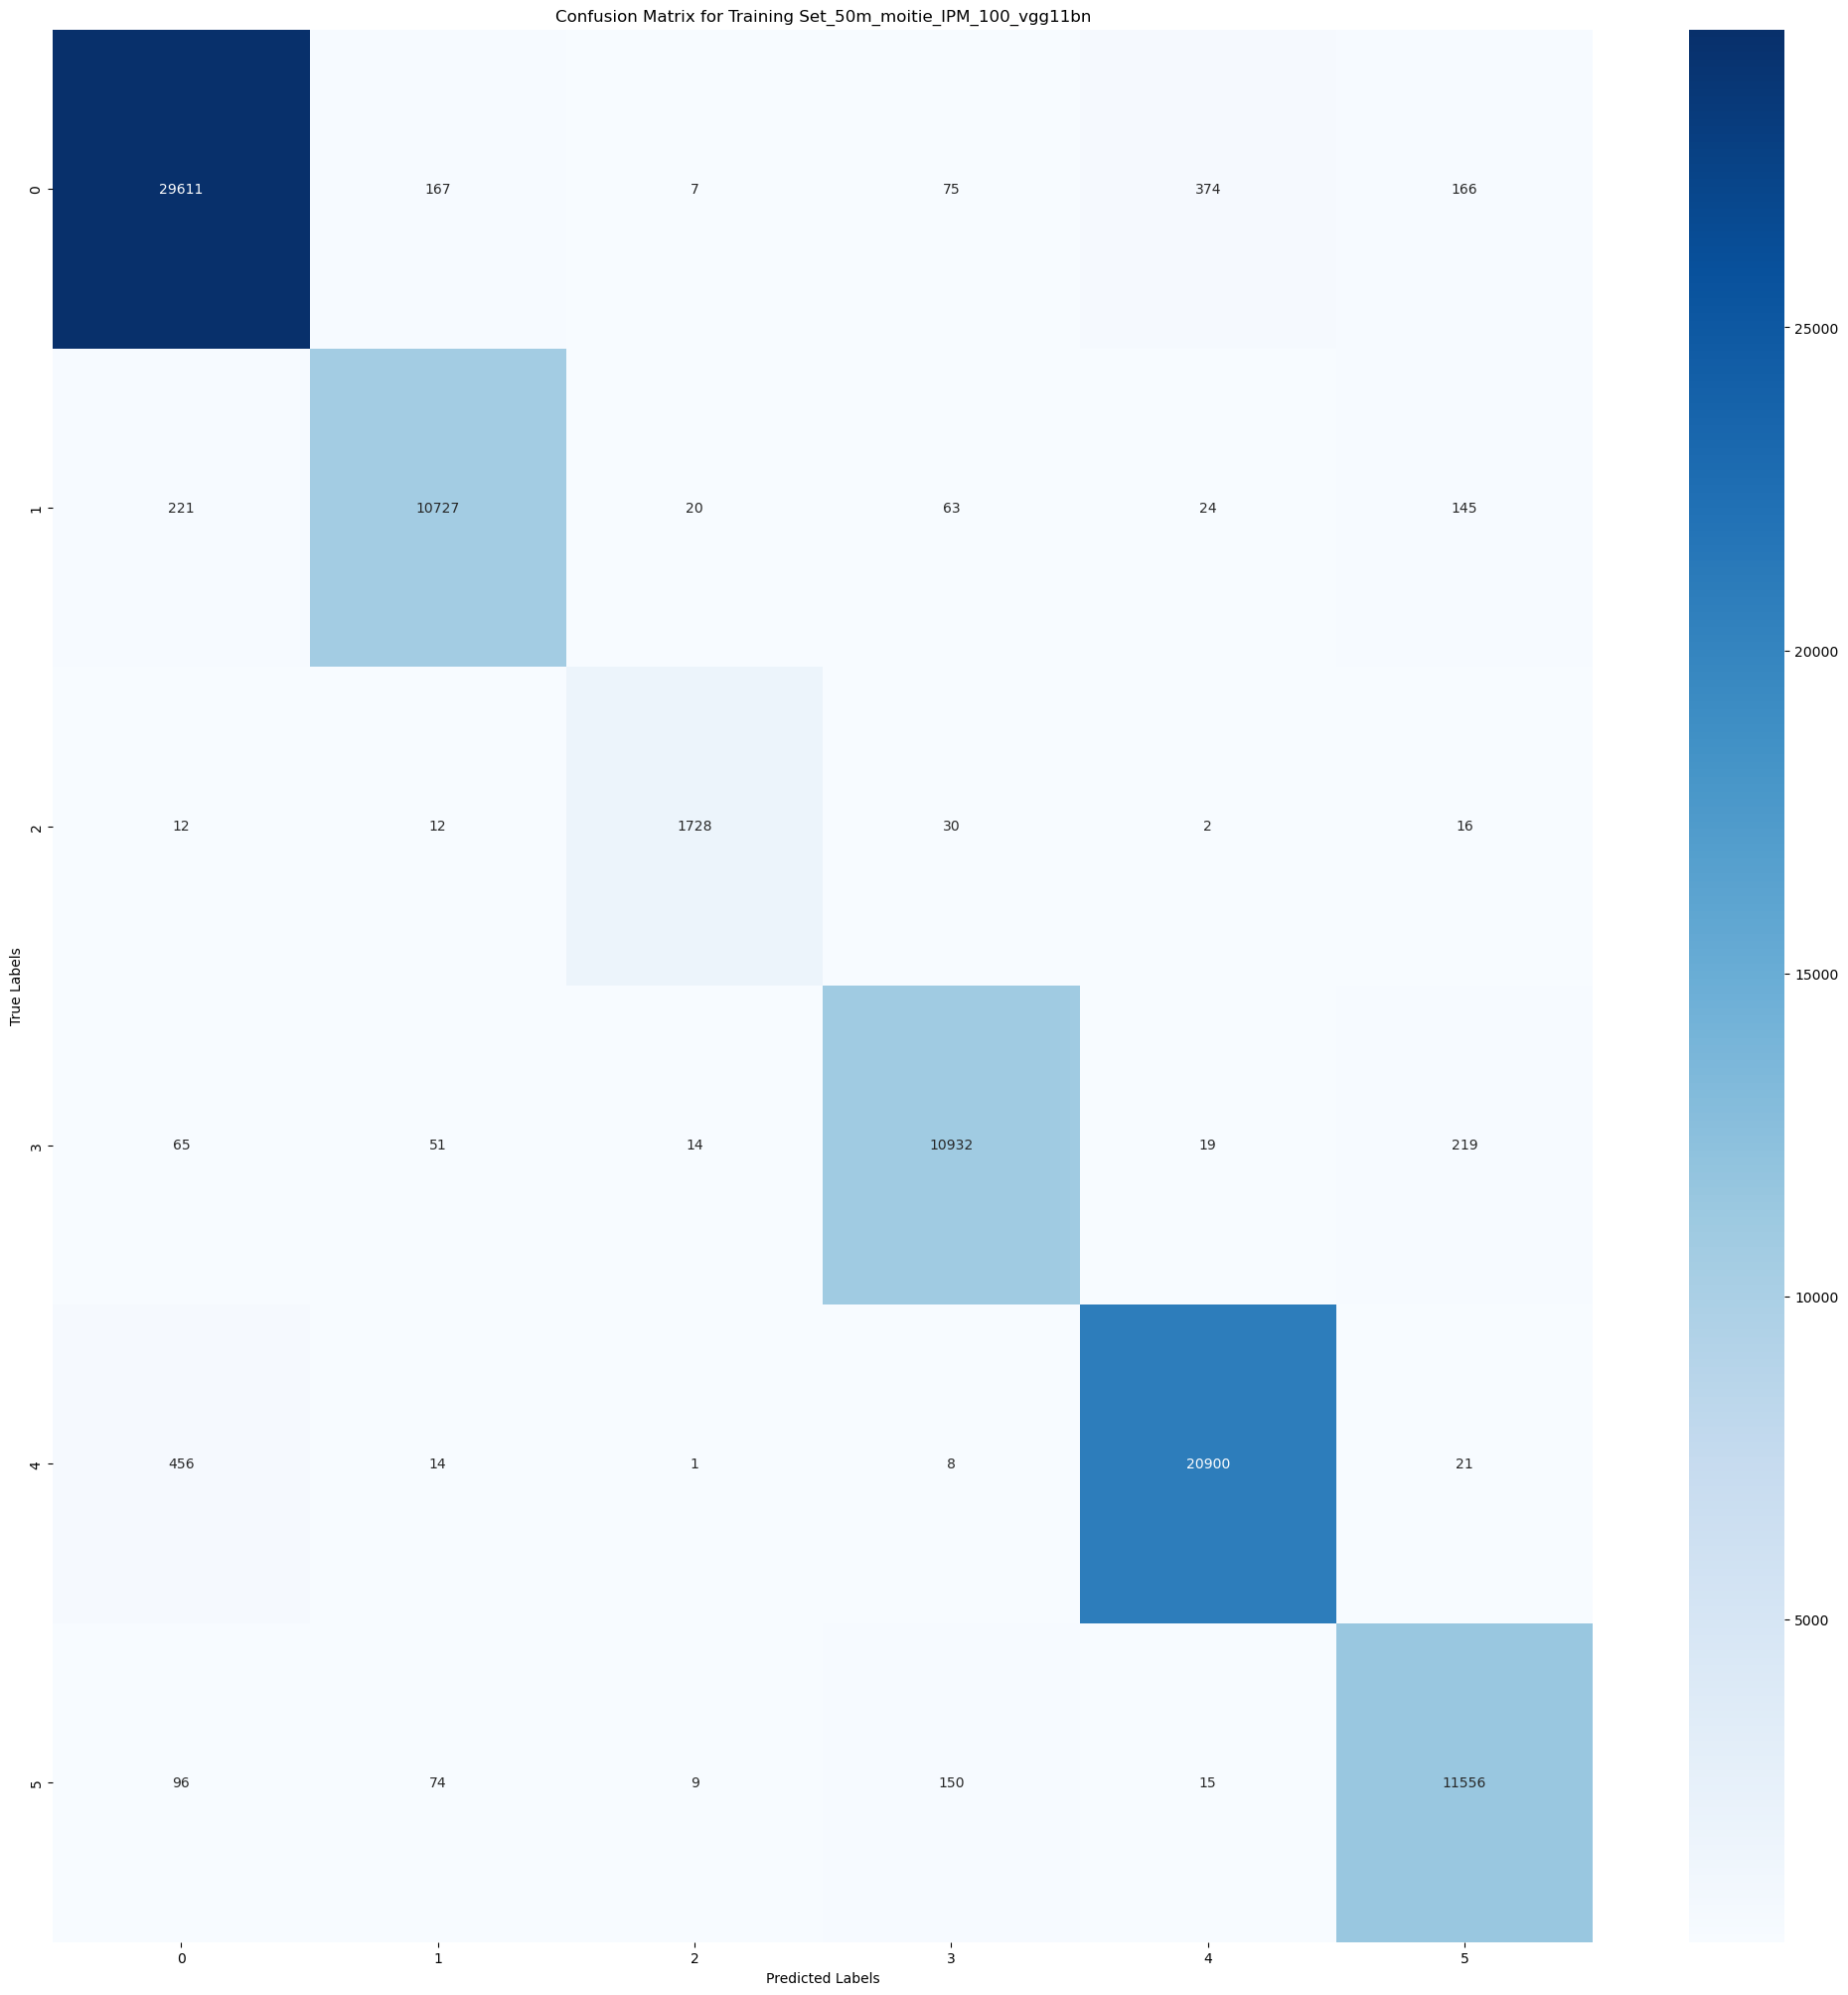

In [49]:
# Sauvegarder les labels et les prédictions
all_preds = []
all_labels = []

for inputs, labels in dataloaders_dict[f'train_{X}m_{moitiequarts}_IPM_{Y}']:
    inputs = inputs.to(device)
    labels = labels.to(device)

    with torch.set_grad_enabled(False):
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)

    all_preds.extend(preds.cpu().numpy())
    all_labels.extend(labels.cpu().numpy())

all_preds_tensor = torch.tensor(all_preds)
all_labels_tensor = torch.tensor(all_labels)

# Matrice de confusion pour le jeu d'entraînement
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(25, 25))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix for Training Set_{X}m_{moitiequarts}_IPM_{Y}_vgg11bn')
plt.show()



In [50]:
# La confusion matrix
cm

array([[29611,   167,     7,    75,   374,   166],
       [  221, 10727,    20,    63,    24,   145],
       [   12,    12,  1728,    30,     2,    16],
       [   65,    51,    14, 10932,    19,   219],
       [  456,    14,     1,     8, 20900,    21],
       [   96,    74,     9,   150,    15, 11556]], dtype=int64)

Ce fragment de code génère un rapport de classification à partir des étiquettes réelles et des prédictions collectées lors de l'évaluation du modèle sur l'ensemble d'entraînement.

In [51]:
# Rapport de classification
from sklearn.metrics import classification_report
# Convertit les listes en array de types numpy si elles ne sont pas convertit
# Supposons que "all_preds" et "all_labels" sont des listes d'array numpy ou des tenseurs en PyTorch 
true_labels = np.array(all_labels)
predicted_labels = np.array(all_preds)

# Génère un rapport de  classification
report = classification_report(true_labels, predicted_labels, digits=4)
print(report)



              precision    recall  f1-score   support

           0     0.9721    0.9740    0.9731     30400
           1     0.9712    0.9578    0.9644     11200
           2     0.9713    0.9600    0.9656      1800
           3     0.9710    0.9674    0.9692     11300
           4     0.9797    0.9766    0.9781     21400
           5     0.9532    0.9711    0.9621     11900

    accuracy                         0.9711     88000
   macro avg     0.9698    0.9678    0.9688     88000
weighted avg     0.9711    0.9711    0.9711     88000



###### Calcul mécanique de ce qui précède

In [52]:
#Conversion des listes en array de types Numpy(Si ce n'est pas le cas)
import numpy as np

all_preds_array = np.array(all_preds)
all_labels_array = np.array(all_labels)

# Use classification_report to Calculate Metrics
from sklearn.metrics import classification_report

# Calcul et imprime le rapport de classification
print(classification_report(all_labels_array, all_preds_array))

# Calcul de l'Accuracy par Classe Mécanique
from sklearn.metrics import confusion_matrix

# Calcul de l'Accuracy par classe
cm = confusion_matrix(all_labels_array, all_preds_array)
per_class_accuracy = cm.diagonal() / cm.sum(axis=1)
print(per_class_accuracy)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     30400
           1       0.97      0.96      0.96     11200
           2       0.97      0.96      0.97      1800
           3       0.97      0.97      0.97     11300
           4       0.98      0.98      0.98     21400
           5       0.95      0.97      0.96     11900

    accuracy                           0.97     88000
   macro avg       0.97      0.97      0.97     88000
weighted avg       0.97      0.97      0.97     88000

[0.97404605 0.95776786 0.96       0.96743363 0.97663551 0.97109244]


Cette portion de code étendue est conçue pour évaluer de manière plus détaillée la performance du modèle de réseau de neurones convolutif (CNN) sur l'ensemble de validation.  

100%|██████████| 54838/54838 [21:01<00:00, 43.48it/s]


Validation Loss: 1.0417
Validation Accuracy: 0.7652


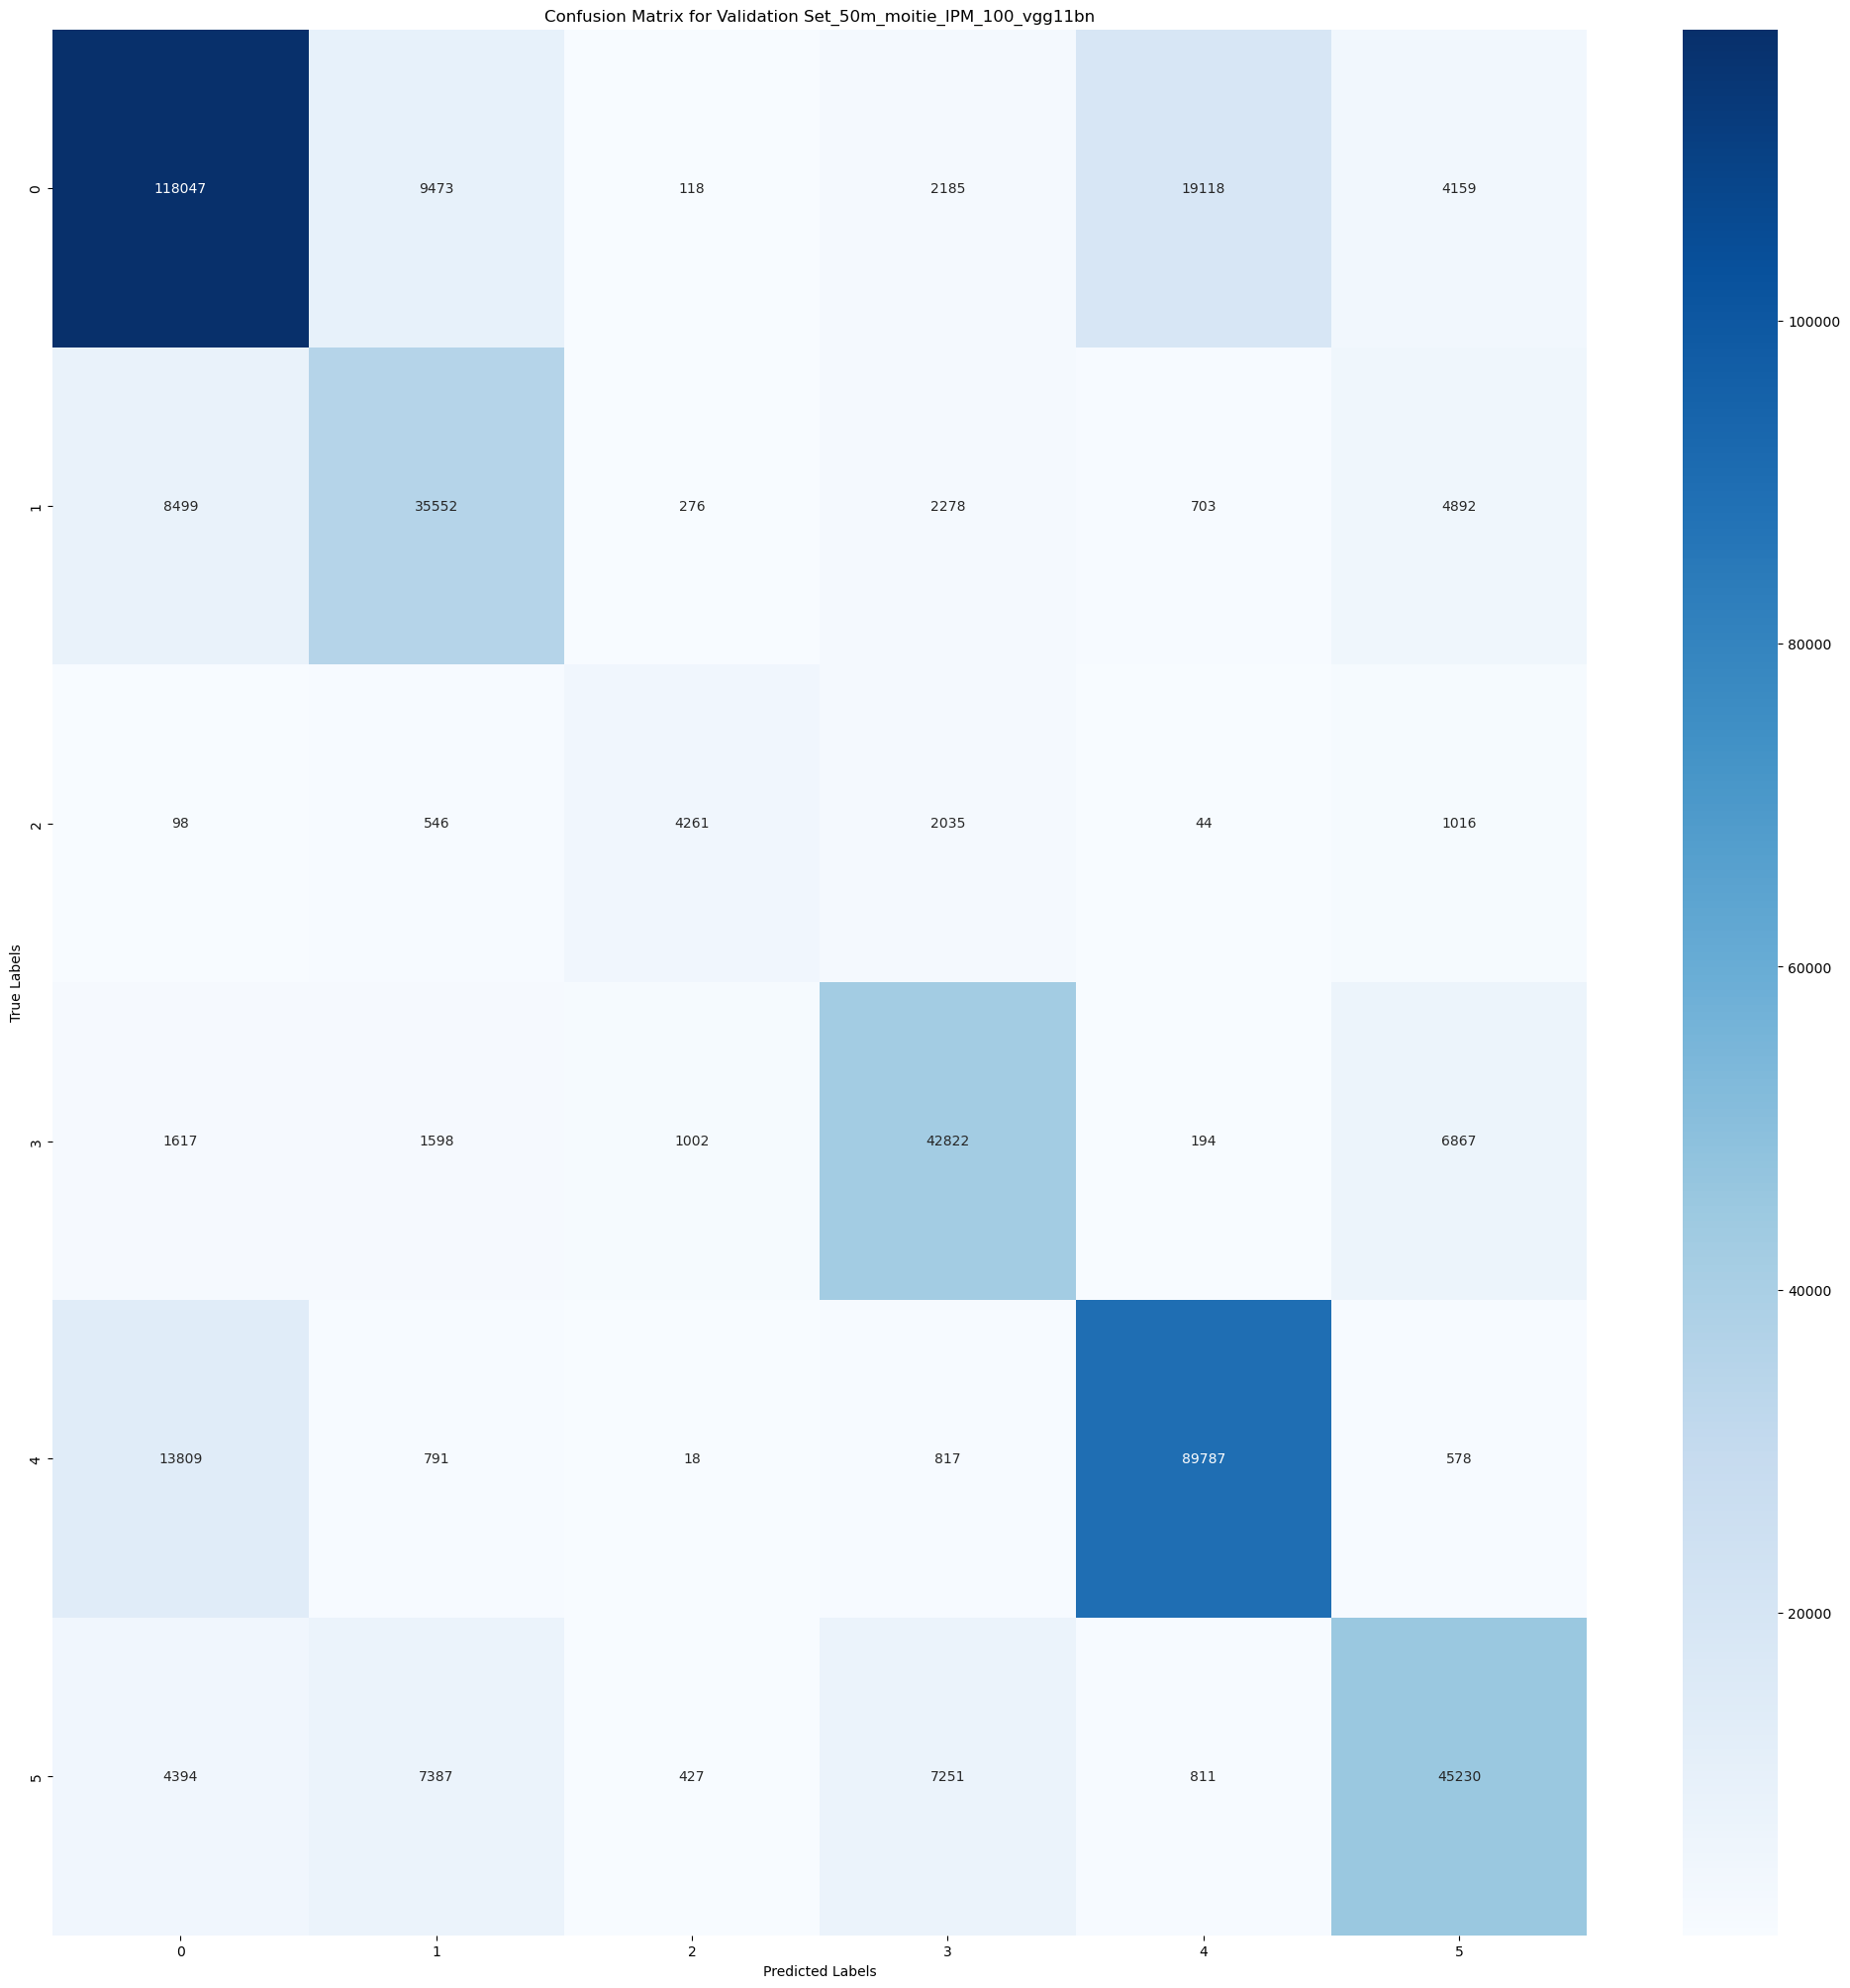

In [53]:
# Évaluation sur le jeu de validation
# Importation de la bibliothèque nécessaire pour la barre de progression
from tqdm import tqdm

# Met le modèle en mode d'évaluation. Cela est crucial car cela désactive des comportements spécifiques à l'entraînement,
# tels que les dropout layers et la normalisation par lots, qui ne devraient pas être utilisés lors de l'évaluation.
model_ft.eval()

# Initialisation des variables pour accumuler la perte totale et le nombre total de prédictions correctes
running_loss = 0.0
running_corrects = 0
total = 0

# Désactive le calcul du gradient, réduisant la consommation de mémoire et accélérant le processus
# puisque les gradients ne sont pas nécessaires pour l'évaluation.
with torch.no_grad():
        #Itère sur les données de l'ensemble de validation. tqdm est utilisé pour afficher une barre de progression.
    for inputs, labels in tqdm(dataloaders_dict[f'valid_{X}m_{moitiequarts}_IPM_{Y}']):
        # Transfère les inputs et les labels sur le dispositif de calcul (GPU ou CPU).
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Calcule les sorties en passant les inputs à travers le modèle.
        outputs = model_ft(inputs)
        
        # Calcule la perte entre les sorties prédites et les vrais labels.
        loss = criterion(outputs, labels)
        
        # Trouve la classe prédite pour chaque input en prenant l'indice de la valeur maximale dans les prédictions logit.
        _, preds = torch.max(outputs, 1)

        # Accumule la perte totale en ajoutant la perte de ce lot.
        running_loss += loss.item() * inputs.size(0)
        
        # Accumule le nombre total de prédictions correctes.
        running_corrects += torch.sum(preds == labels.data)
        
        # Accumule le nombre total d'exemples vus.
        total += inputs.size(0)
# Calcule la perte moyenne sur l'ensemble de validation.
val_loss = running_loss / total

# Calcule la précision globale sur l'ensemble de validation.
val_acc = running_corrects.double() / total

# Affiche la perte moyenne et la précision sur l'ensemble de validation.
print(f'Validation Loss: {val_loss:.4f}')
print(f'Validation Accuracy: {val_acc:.4f}')

# Matrice de confusion pour le jeu de validation
val_preds = []
val_labels = []

for inputs, labels in dataloaders_dict[f'valid_{X}m_{moitiequarts}_IPM_{Y}']:
    inputs = inputs.to(device)
    labels = labels.to(device)

    with torch.no_grad():
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)
    
    val_preds.extend(preds.cpu().numpy())
    val_labels.extend(labels.cpu().numpy())

    
# Calcul de la matrice de confusion en utilisant scikit-learn
cm_val = confusion_matrix(val_labels, val_preds)
# Utilisation de Seaborn pour afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(cm_val, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix for Validation Set_{X}m_{moitiequarts}_IPM_{Y}_vgg11bn')
plt.show()



In [54]:
# Rapport de classification pour le jeu de validation
# Conversion des listes en tableaux numpy pour une utilisation avec scikit-learn

val_true_labels_array = np.array(val_labels)
val_predictions_array = np.array(val_preds)

# Générez le rapport de classification pour l'ensemble de validation
val_report = classification_report(val_true_labels_array, val_predictions_array, digits=4)
print(f"Classification Report for Validation Set_{X}m_{moitiequarts}_IPM_{Y}:\n", val_report)



Classification Report for Validation Set_50m_moitie_IPM_100:
               precision    recall  f1-score   support

           0     0.8060    0.7710    0.7881    153100
           1     0.6423    0.6811    0.6611     52200
           2     0.6983    0.5326    0.6043      8000
           3     0.7462    0.7915    0.7682     54100
           4     0.8114    0.8486    0.8296    105800
           5     0.7209    0.6905    0.7054     65500

    accuracy                         0.7652    438700
   macro avg     0.7375    0.7192    0.7261    438700
weighted avg     0.7658    0.7652    0.7649    438700



In [55]:
# Précision (Accuracy) par classe pour le jeu de validation
# Calculez la matrice de confusion pour l'ensemble de validation
val_cm = confusion_matrix(val_true_labels_array, val_predictions_array)

# Calculez la précision par classe manuellement à partir de la matrice de confusion
val_per_class_accuracy = val_cm.diagonal() / val_cm.sum(axis=1)
print(f"Per-class Accuracy for the Validation Set_{X}m_{moitiequarts}_IPM_{Y}:", val_per_class_accuracy)

Per-class Accuracy for the Validation Set_50m_moitie_IPM_100: [0.77104507 0.6810728  0.532625   0.7915342  0.84864839 0.69053435]


##### Sauvegarde des graphes

In [56]:
import os
import numpy as np
import pandas as pd
import torch
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Configuration initiale

BASE_DIR = r'D:\Poverty_Predict_Par_Milieu'#Choisir une base directory

GRAPH_DIR = os.path.join(BASE_DIR, f'Graph_etape_cnn_pred_nightlights_{X}m_{moitiequarts}_IPM_{Y}_vgg11bn')
os.makedirs(GRAPH_DIR, exist_ok=True)

# Fonction pour générer et sauvegarder l'histogramme de distribution
def save_histogram(data, column, title, filename):
    plt.hist(data[column], bins='auto', alpha=0.7, rwidth=0.85)
    plt.xlabel('Nightlights Bin')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.grid(axis='y', alpha=0.75)
    plt.savefig(os.path.join(GRAPH_DIR, filename))
    plt.close()

# Fonction pour générer et sauvegarder la heatmap de la matrice de confusion
def save_confusion_matrix_heatmap(y_true, y_pred, title, filename):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(25,25))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.savefig(os.path.join(GRAPH_DIR, filename))
    plt.close()

# Fonction pour générer et sauvegarder le rapport de classification
def save_classification_report(y_true, y_pred, filename, digits=4):
    report = classification_report(y_true, y_pred, digits=digits)
    with open(os.path.join(GRAPH_DIR, filename), 'w') as f:
        f.write(report)

# Génération et sauvegarde des fichiers
save_histogram(globals()[df_name], f'nightlights_{X}m_bins', f'Distribution of Nightlights Bin', f'distribution_nightlights_bin_{X}m_IPM_{Y}_vgg11bn.png')
save_confusion_matrix_heatmap(all_labels, all_preds, f'Confusion Matrix for Training Set', f'confusion_matrix_train_{X}m_IPM_{Y}_vgg11bn.png')
save_confusion_matrix_heatmap(val_labels, val_preds, f'Confusion Matrix for Validation Set', f'confusion_matrix_val_{X}m_IPM_{Y}_vgg11bn.png')
save_classification_report(all_labels_array, all_preds_array, f'classification_report_train_{X}m_IPM_{Y}_vgg11bn.txt')
save_classification_report(val_true_labels_array, val_predictions_array, f'classification_report_val_{X}m_IPM_{Y}_vgg11bn.txt')